In [2]:
!pip install altair

  Using cached altair-5.4.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached attrs-24.2.0-py3-none-any.whl.metadata (11 kB)
  Using cached jsonschema_specifications-2024.10.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
Using cached altair-5.4.1-py3-none-any.whl (658 kB)
Using cached jsonschema-4.23.0-py3-none-any.whl (88 kB)
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
Using cached attrs-24.2.0-py3-none-any.whl (63 kB)
Using cached jsonschema_specifications-2024.10.1-py3-none-any.whl (18 kB)
Using cached referencing-0.35.1-py3-none-any.whl (26 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pi

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

ex1 =pd.read_csv('./ex1.csv')
ex2 =pd.read_csv('./ex2.csv')
ex2


,MatrixA_Rows,MatrixA_Cols,MatrixB_Cols,HostToDeviceTime,GPUExecutionTime,DeviceToHostTime
0,64,128,64,0.000635,0.000001,0.0
1,1024,1023,8193,0.138303,0.000000,0.0
2,1600,1023,8193,0.140934,0.000000,0.0
3,1600,1600,8193,0.175418,0.000000,0.0
4,2048,1600,8193,0.172819,0.000000,0.0


In [ ]:
import altair as alt
import numpy as np

metrics = ex1.melt(
    id_vars=["InputLength", "BlockSize"],
    value_vars=["HostToDeviceTime", "GPUExecutionTime", "DeviceToHostTime"],
    var_name="Metric",
    value_name="Value",
)

charts = []
for in_len in metrics["InputLength"].unique():
    source = metrics[metrics["InputLength"] == in_len]
    chart = (
        alt.Chart(source)
        .mark_bar(width=50)
        .encode(x="BlockSize:N", y="Value", color="Metric")
        .properties(width=300, height=200, title=f"InputLength = 2^{int(np.log2(in_len))}")
    )
    charts.append(chart)

alt.concat(*charts, columns=2)

alt.ConcatChart(...)

In [23]:
metrics2

,MatrixA_Rows,MatrixA_Cols,MatrixB_Cols,Metric,Value
0,64,128,64,HostToDeviceTime,0.000635
1,1024,1023,8193,HostToDeviceTime,0.138303
2,1600,1023,8193,HostToDeviceTime,0.140934
3,1600,1600,8193,HostToDeviceTime,0.175418
4,2048,1600,8193,HostToDeviceTime,0.172819
5,64,128,64,GPUExecutionTime,0.000001
6,1024,1023,8193,GPUExecutionTime,0.000000
7,1600,1023,8193,GPUExecutionTime,0.000000
8,1600,1600,8193,GPUExecutionTime,0.000000
9,2048,1600,8193,GPUExecutionTime,0.000000


In [49]:
ids = ["MatrixA_Rows", "MatrixA_Cols", "MatrixB_Cols"]
metrics2 = ex2.melt(
    id_vars=ids,
    value_vars=["HostToDeviceTime", "GPUExecutionTime", "DeviceToHostTime"],
    var_name="Metric",
    value_name="Value",
)
charts = []
for id in metrics2[ids].drop_duplicates().values:
    source = metrics2[(metrics2.loc[:, ids] == id).all(axis=1)]
    # print(source.head())

    chart = (
        alt.Chart(source)
        .mark_bar(width=50)
        .encode(x="id:N", y="Value", color="Metric")
        .properties(width=300, height=200, title=f"{id}")
    )

    # source = metrics[metrics["InputLength"] == in_len]
    # chart = (
    #     alt.Chart(source)
    #     .mark_bar(width=50)
    #     .encode(x="BlockSize:N", y="Value", color="Metric")
    #     .properties(width=300, height=200, title=f"InputLength = 2^{int(np.log2(in_len))}")
    # )
    charts.append(chart)

alt.concat(*charts, columns=2)

alt.ConcatChart(...)

In [55]:
dimension_order

['64x128x64',
 '1024x1023x8193',
 '1600x1023x8193',
 '1600x1600x8193',
 '2048x1600x8193']

In [ ]:
import pandas as pd
import altair as alt

# Read the CSV file
df = pd.read_csv('ex2_.csv')

# Create a label column for matrix dimensions and calculate FLOPs
df['Matrix_Dimensions'] = df.apply(
    lambda row: f"{int(row['MatrixA_Rows'])}x{int(row['MatrixA_Cols'])}x{int(row['MatrixB_Cols'])}", 
    axis=1
)

# Calculate FLOPs (2*M*N*K) and GFLOPS
df['FLOPs'] = 2 * df['MatrixA_Rows'] * df['MatrixA_Cols'] * df['MatrixB_Cols']
df['Total_Time'] = df['HostToDeviceTime'] + df['GPUExecutionTime'] + df['DeviceToHostTime']
df['GFLOPS'] = df['FLOPs'] / (df['GPUExecutionTime'] * 1e9)  # Convert to GFLOPS

# Sort the dataframe by FLOPs and create a sorted list of dimensions
df = df.sort_values('FLOPs')
dimension_order = df['Matrix_Dimensions'].tolist()

# Melt the dataframe to get timing data in long format
df_melted = pd.melt(
    df,
    id_vars=['Matrix_Dimensions', 'FLOPs', 'GFLOPS'],
    value_vars=['HostToDeviceTime', 'GPUExecutionTime', 'DeviceToHostTime'],
    var_name='Operation',
    value_name='Time (seconds)'
)

# Create a stacked bar chart
base = alt.Chart(df_melted).encode(
    x=alt.X('Matrix_Dimensions:N', 
            sort=dimension_order,  # Use our custom sort order
            title='Matrix Dimensions (AxKxB)'),
    tooltip=[
        alt.Tooltip('Matrix_Dimensions:N', title='Dimensions'),
        alt.Tooltip('Operation:N', title='Operation'),
        alt.Tooltip('Time (seconds):Q', format='.6f'),
        alt.Tooltip('FLOPs:Q', format='.2e', title='Total FLOPs'),
        alt.Tooltip('GFLOPS:Q', format='.2f', title='GFLOPS (GPU only)')
    ]
)

# Create the stacked bar chart
bars = base.mark_bar(width=90).encode(
    y=alt.Y('Time (seconds):Q', stack=True),
    color=alt.Color('Operation:N', 
        scale=alt.Scale(
            domain=['HostToDeviceTime', 'GPUExecutionTime', 'DeviceToHostTime'],
            range=['#ff9999', '#66b3ff', '#99ff99']
        ),
        legend=alt.Legend(title='Operation Type')
    )
)

# Add text labels for total time and GFLOPS
total_times = df_melted.groupby('Matrix_Dimensions', sort=False)[['Time (seconds)', 'GFLOPS']].agg({
    'Time (seconds)': 'sum',
    'GFLOPS': 'first'
}).reset_index()

text_time = alt.Chart(total_times).mark_text(
    align='center',
    baseline='bottom',
    dy=-5
).encode(
    x=alt.X('Matrix_Dimensions:N', sort=dimension_order),
    y='Time (seconds):Q',
    text=alt.Text('Time (seconds):Q', format='.3f')
)

text_gflops = alt.Chart(total_times).mark_text(
    align='center',
    baseline='bottom',
    dy=10,
    color='darkgreen'
).encode(
    x=alt.X('Matrix_Dimensions:N', sort=dimension_order),
    y='Time (seconds):Q',
    text=alt.Text('GFLOPS:Q', format='.1f')
)

# Combine all elements
chart = (bars + text_time + text_gflops).properties(
    width=800,
    height=400,
    title='Performance Breakdown by Matrix Dimensions'
).configure_axis(
    labelAngle=45
).configure_title(
    fontSize=16
)

# Save the chart
# chart.save('gemm_performance.html')
chart.show()

alt.LayerChart(...)

In [69]:
chart.show()

alt.LayerChart(...)

In [ ]:
import pandas as pd
import altair as alt

# Read the CSV file
df = pd.read_csv('ex2_double.csv')

# Create a label column for matrix dimensions and calculate FLOPs
df['Matrix_Dimensions'] = df.apply(
    lambda row: f"{int(row['MatrixA_Rows'])}x{int(row['MatrixA_Cols'])}x{int(row['MatrixB_Cols'])}", 
    axis=1
)

# Calculate FLOPs (2*M*N*K) and GFLOPS
df['FLOPs'] = 2 * df['MatrixA_Rows'] * df['MatrixA_Cols'] * df['MatrixB_Cols']
df['Total_Time'] = df['HostToDeviceTime'] + df['GPUExecutionTime'] + df['DeviceToHostTime']
df['GFLOPS'] = df['FLOPs'] / (df['GPUExecutionTime'] * 1e9)  # Convert to GFLOPS

# Sort the dataframe by FLOPs and create a sorted list of dimensions
df = df.sort_values('FLOPs')
dimension_order = df['Matrix_Dimensions'].tolist()

# Melt the dataframe to get timing data in long format
df_melted = pd.melt(
    df,
    id_vars=['Matrix_Dimensions', 'FLOPs', 'GFLOPS'],
    value_vars=['HostToDeviceTime', 'GPUExecutionTime', 'DeviceToHostTime'],
    var_name='Operation',
    value_name='Time (seconds)'
)

# Create a stacked bar chart
base = alt.Chart(df_melted).encode(
    x=alt.X('Matrix_Dimensions:N', 
            sort=dimension_order,  # Use our custom sort order
            title='Matrix Dimensions (AxKxB)'),
    tooltip=[
        alt.Tooltip('Matrix_Dimensions:N', title='Dimensions'),
        alt.Tooltip('Operation:N', title='Operation'),
        alt.Tooltip('Time (seconds):Q', format='.6f'),
        alt.Tooltip('FLOPs:Q', format='.2e', title='Total FLOPs'),
        alt.Tooltip('GFLOPS:Q', format='.2f', title='GFLOPS (GPU only)')
    ]
)

# Create the stacked bar chart
bars = base.mark_bar(width=90).encode(
    y=alt.Y('Time (seconds):Q', stack=True),
    color=alt.Color('Operation:N', 
        scale=alt.Scale(
            domain=['HostToDeviceTime', 'GPUExecutionTime', 'DeviceToHostTime'],
            range=['#ff9999', '#66b3ff', '#99ff99']
        ),
        legend=alt.Legend(title='Operation Type')
    )
)

# Add text labels for total time and GFLOPS
total_times = df_melted.groupby('Matrix_Dimensions', sort=False)[['Time (seconds)', 'GFLOPS']].agg({
    'Time (seconds)': 'sum',
    'GFLOPS': 'first'
}).reset_index()

text_time = alt.Chart(total_times).mark_text(
    align='center',
    baseline='bottom',
    dy=-5
).encode(
    x=alt.X('Matrix_Dimensions:N', sort=dimension_order),
    y='Time (seconds):Q',
    text=alt.Text('Time (seconds):Q', format='.3f')
)

text_gflops = alt.Chart(total_times).mark_text(
    align='center',
    baseline='bottom',
    dy=10,
    color='darkgreen'
).encode(
    x=alt.X('Matrix_Dimensions:N', sort=dimension_order),
    y='Time (seconds):Q',
    text=alt.Text('GFLOPS:Q', format='.1f')
)

# Combine all elements
chart = (bars + text_time + text_gflops).properties(
    width=800,
    height=400,
    title='Performance Breakdown by Matrix Dimensions'
).configure_axis(
    labelAngle=45
).configure_title(
    fontSize=16
)

# Save the chart
# chart.save('gemm_performance.html')
chart.show()

alt.LayerChart(...)

alt.LayerChart(...)

In [ ]:
df['DeviceToHostRatio']  = df['DeviceToHostTime'] / df['Total_Time']
df['HostToDeviceRatio']  = df['HostToDeviceTime'] / df['Total_Time']
df['GPUExecutionRatio']  = df['GPUExecutionTime'] / df['Total_Time']
df

,MatrixA_Rows,MatrixA_Cols,MatrixB_Cols,HostToDeviceTime,GPUExecutionTime,DeviceToHostTime,Matrix_Dimensions,FLOPs,Total_Time,GFLOPS,DeviceToHostRatio,HostToDeviceRatio,GPUExecutionRatio
0,64,128,64,0.000043,0.001682,0.000027,64x128x64,1048576,0.001752,0.623410,0.015411,0.024543,0.960046
1,1024,1023,8193,0.005987,0.034094,0.035130,1024x1023x8193,17165187072,0.075211,503.466506,0.467086,0.079603,0.453311
2,1600,1023,8193,0.006733,0.052706,0.054071,1600x1023x8193,26820604800,0.113510,508.871946,0.476355,0.059316,0.464329
3,1600,1600,8193,0.010202,0.080924,0.054283,1600x1600x8193,41948160000,0.145409,518.364886,0.373313,0.070161,0.556527
4,2048,1600,8193,0.010423,0.101501,0.071114,2048x1600x8193,53693644800,0.183038,528.996215,0.388520,0.056944,0.554535


In [ ]:
df['DeviceToHostRatio']  = df['DeviceToHostTime'] / df['Total_Time']
df['HostToDeviceRatio']  = df['HostToDeviceTime'] / df['Total_Time']
df['GPUExecutionRatio']  = df['GPUExecutionTime'] / df['Total_Time']
df

,MatrixA_Rows,MatrixA_Cols,MatrixB_Cols,HostToDeviceTime,GPUExecutionTime,DeviceToHostTime,Matrix_Dimensions,FLOPs,Total_Time,GFLOPS,DeviceToHostRatio,HostToDeviceRatio,GPUExecutionRatio
0,64,128,64,0.000035,0.000937,0.000018,64x128x64,1048576,0.000990,1.119078,0.018182,0.035354,0.946465
1,1024,1023,8193,0.003129,0.007910,0.017273,1024x1023x8193,17165187072,0.028312,2170.061577,0.610095,0.110519,0.279387
2,1600,1023,8193,0.003303,0.012320,0.027028,1600x1023x8193,26820604800,0.042651,2176.997143,0.633701,0.077442,0.288856
3,1600,1600,8193,0.005066,0.020835,0.027687,1600x1600x8193,41948160000,0.053588,2013.350612,0.516664,0.094536,0.388800
4,2048,1600,8193,0.005295,0.026596,0.035586,2048x1600x8193,53693644800,0.067477,2018.861663,0.527380,0.078471,0.394149


<Axes: xlabel='Matrix_Dimensions'>

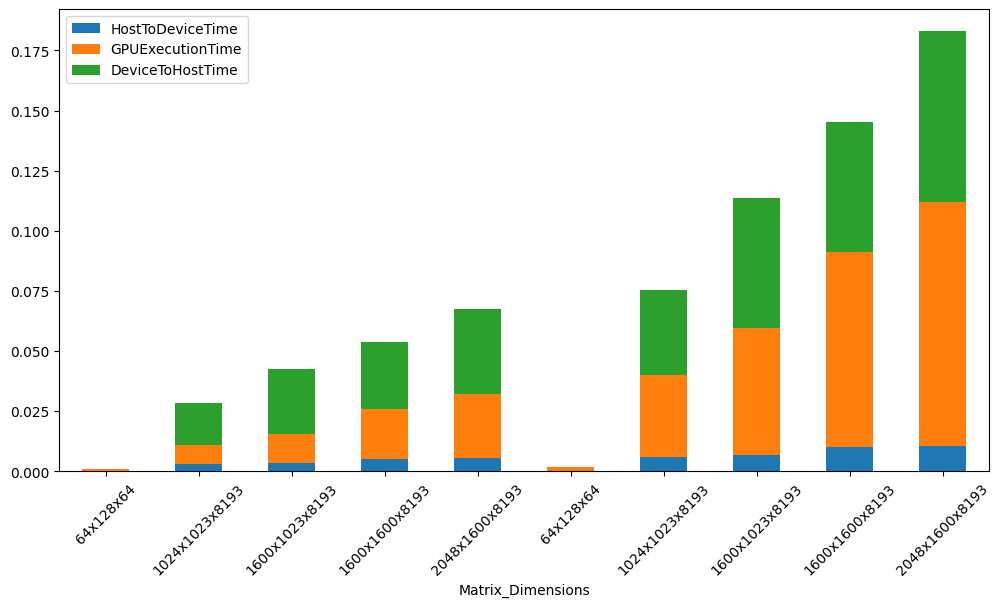

In [ ]:
df_float = pd.read_csv('ex2_.csv')
df_double = pd.read_csv('ex2_double.csv')

# Add data type column to each dataframe
df_float['Data_Type'] = 'Float'
df_double['Data_Type'] = 'Double'

def process_df(df):
    # Create dimension labels and calculate FLOPs
    df['Matrix_Dimensions'] = df.apply(
        lambda row: f"{int(row['MatrixA_Rows'])}x{int(row['MatrixA_Cols'])}x{int(row['MatrixB_Cols'])}", 
        axis=1
    )
    df['Total_Time'] = df['HostToDeviceTime'] + df['GPUExecutionTime'] + df['DeviceToHostTime']
    return df.drop(columns=['MatrixA_Rows', 'MatrixA_Cols', 'MatrixB_Cols'])

df_float = process_df(df_float)
df_double = process_df(df_double)

# Combine the dataframes
df_combined = pd.concat([df_float, df_double])

df_combined.plot.bar(x='Matrix_Dimensions',
                     y=['HostToDeviceTime', 'GPUExecutionTime', 'DeviceToHostTime'],
                     stacked=True,
                     figsize=(12, 6),
                     rot=45)



<Axes: xlabel='Matrix_Dimensions'>

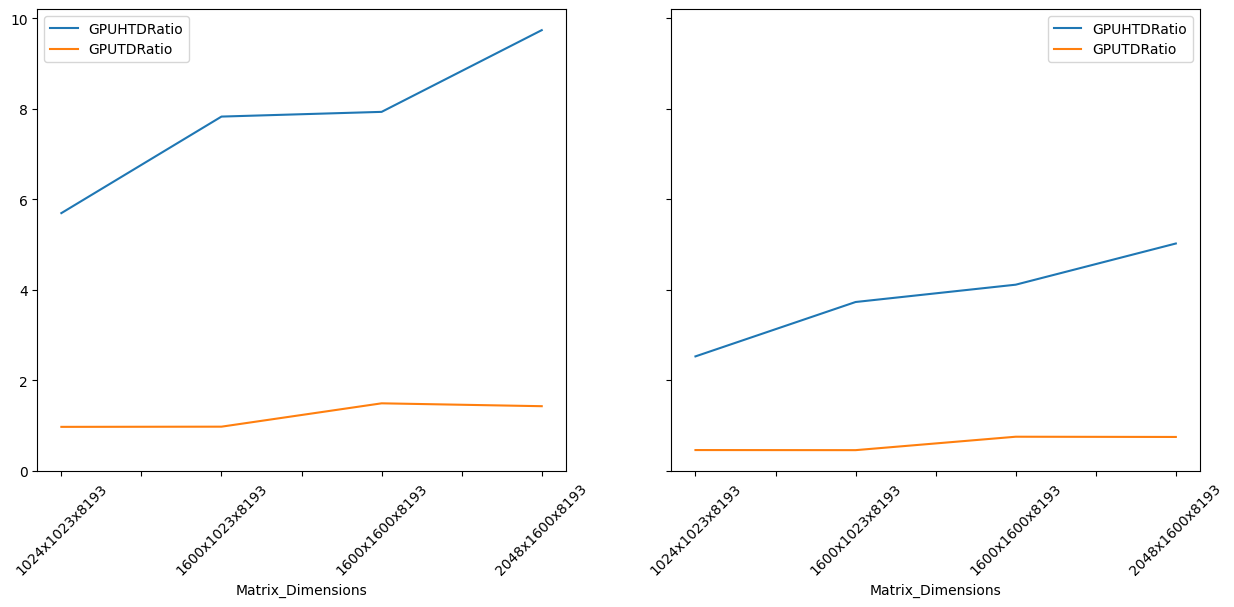

In [113]:
q = df_combined[['Matrix_Dimensions', 'Data_Type', 'HostToDeviceTime', 'GPUExecutionTime', 'DeviceToHostTime']]
q['GPUHTDRatio'] = q['GPUExecutionTime'] / q['HostToDeviceTime']
q['GPUTDRatio'] = q['GPUExecutionTime'] / q['DeviceToHostTime']

q = q[q['GPUHTDRatio'] < 10]

fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(15, 6), sharey='all')
q_doubles = q[q['Data_Type'] == 'Double']
# q_doubles['GPUHTDRatio'] = np.log(q_doubles['GPUHTDRatio'])
# q_doubles['GPUTDRatio'] = np.log(q_doubles['GPUTDRatio'])
q_floats = q[q['Data_Type'] == 'Float']
# q_floats['GPUHTDRatio'] = np.log(q_floats['GPUHTDRatio'])
# q_floats['GPUTDRatio'] = np.log(q_floats['GPUTDRatio'])

q_doubles.plot.line(x='Matrix_Dimensions', y=['GPUHTDRatio', 'GPUTDRatio'], rot=45, ax=ax1)
q_floats.plot.line(x='Matrix_Dimensions', y=['GPUHTDRatio', 'GPUTDRatio'], rot=45, ax=ax2) 


<Axes: title={'center': 'Matrix Multiplication Time Breakdown'}, xlabel='Matrix Dimensions (AxKxB)', ylabel='Time (seconds)'>

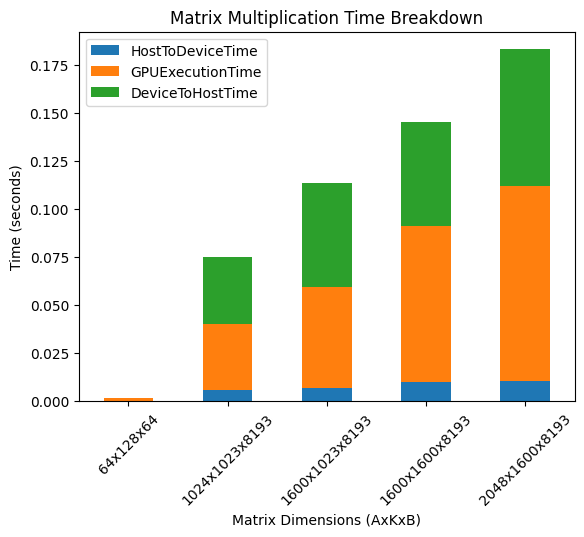

In [128]:

df_doubles = df_combined[df_combined['Data_Type'] == 'Double']

df_doubles.plot.bar(x='Matrix_Dimensions',
                     y=['HostToDeviceTime', 'GPUExecutionTime', 'DeviceToHostTime'],
                     stacked=True,
                     title='Matrix Multiplication Time Breakdown',
                     xlabel='Matrix Dimensions (AxKxB)',
                     ylabel='Time (seconds)',
                     rot=45)

In [125]:
# Function to calculate growth ratios
def calculate_growth_ratios(df, column_name):
    # Calculate ratio compared to previous row within same Data_Type
    return df.groupby('Data_Type')[column_name].transform(lambda x: x / x.shift(1))

# Calculate growth ratios for each timing component
timing_columns = ['HostToDeviceTime', 'GPUExecutionTime', 'DeviceToHostTime', 'Total_Time']

# Create new dataframe with growth ratios
df_with_growth = df_doubles.copy()

for col in timing_columns:
    growth_col_name = f'{col}_Growth'
    df_with_growth[growth_col_name] = calculate_growth_ratios(df_with_growth, col)

# Display the results with cleaner formatting
pd.set_option('display.float_format', lambda x: '%.5f'%x if x != np.nan else 'NaN')
df_with_growth
# print("\nGrowth ratios (each value compared to previous smaller matrix size):")
# print(df_with_growth.to_string(index=False))

,HostToDeviceTime,GPUExecutionTime,DeviceToHostTime,Data_Type,Matrix_Dimensions,Total_Time,GPU-DTH,HostToDeviceTime_Growth,GPUExecutionTime_Growth,DeviceToHostTime_Growth,Total_Time_Growth
0,0.00004,0.00168,0.00003,Double,64x128x64,0.00175,62.29630,NaN,NaN,NaN,NaN
1,0.00599,0.03409,0.03513,Double,1024x1023x8193,0.07521,0.97051,139.23256,20.26992,1301.11111,42.92865
2,0.00673,0.05271,0.05407,Double,1600x1023x8193,0.11351,0.97476,1.12460,1.54590,1.53917,1.50922
3,0.01020,0.08092,0.05428,Double,1600x1600x8193,0.14541,1.49078,1.51522,1.53538,1.00392,1.28102
4,0.01042,0.10150,0.07111,Double,2048x1600x8193,0.18304,1.42730,1.02166,1.25428,1.31006,1.25878


Text(0.5, 1.0, 'Float DataType')

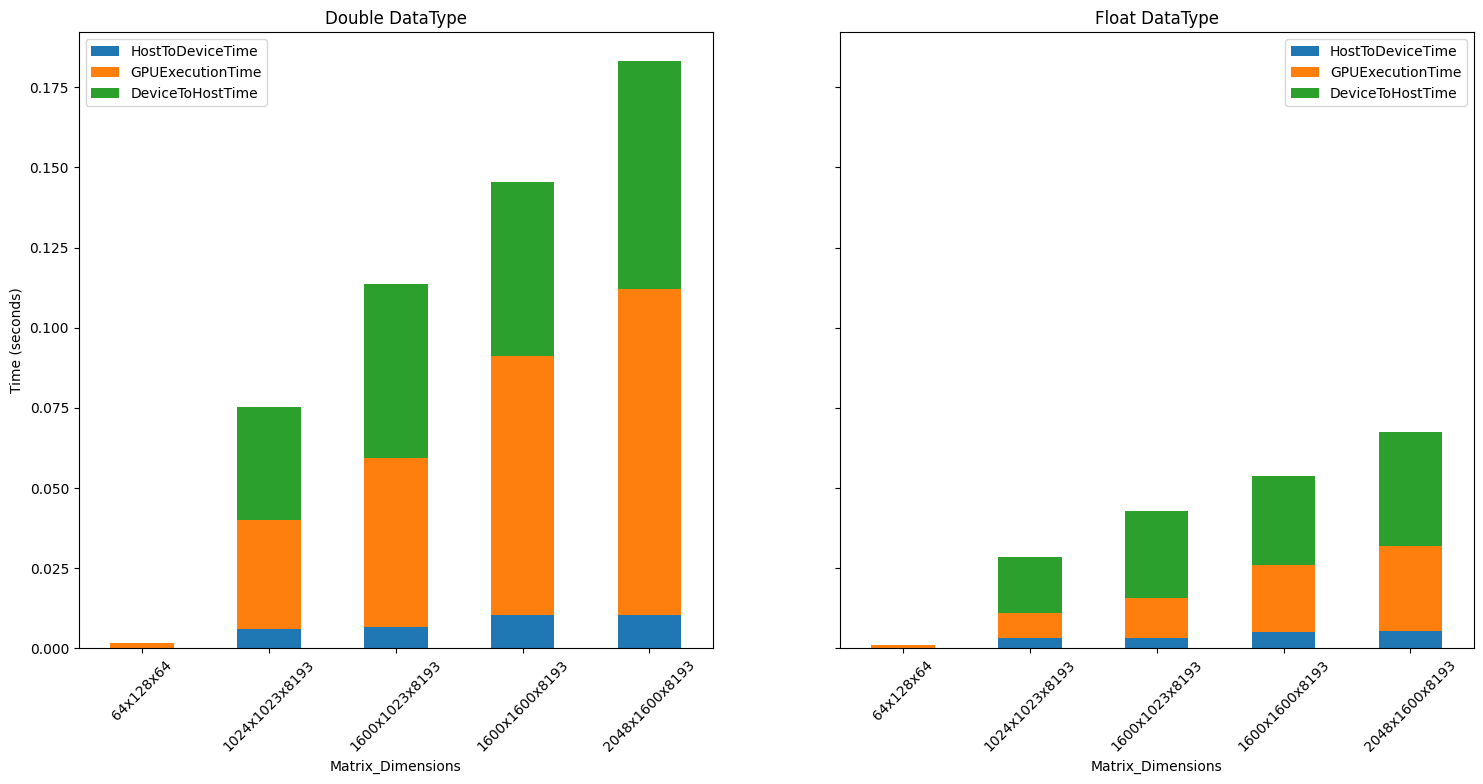

In [130]:
fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(18, 8), sharey='all')

df_doubles = df_combined[df_combined['Data_Type'] == 'Double']
df_floats = df_combined[df_combined['Data_Type'] == 'Float']

df_doubles.plot.bar(x='Matrix_Dimensions',
                     y=['HostToDeviceTime', 'GPUExecutionTime', 'DeviceToHostTime'],
                     stacked=True,
                     rot=45,
                     ax=ax1)
ax1.set_title('Double DataType')

df_floats.plot.bar(x='Matrix_Dimensions',
                     y=['HostToDeviceTime', 'GPUExecutionTime', 'DeviceToHostTime'],
                     stacked=True,
                     rot=45,
                     ax=ax2)
ax1.yaxis.set_label_text('Time (seconds)')
ax2.set_title('Float DataType')

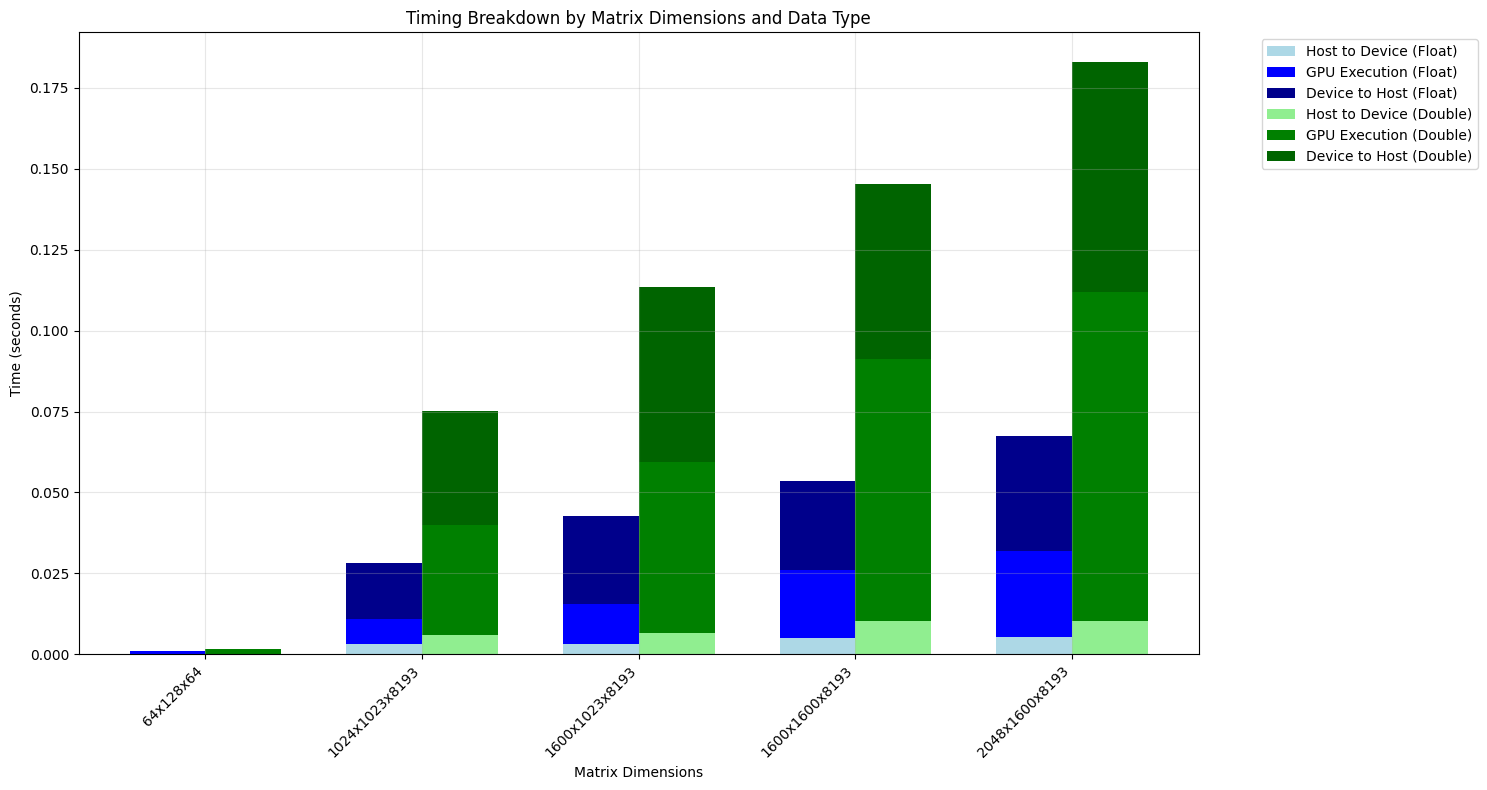

In [ ]:
df_combined

In [76]:
import pandas as pd
import altair as alt

# Read both CSV files
df_float = pd.read_csv('ex2_.csv')
df_double = pd.read_csv('ex2_double.csv')

# Add data type column to each dataframe
df_float['Data_Type'] = 'Float'
df_double['Data_Type'] = 'Double'

# Process each dataframe
def process_df(df):
    # Create dimension labels and calculate FLOPs
    df['Matrix_Dimensions'] = df.apply(
        lambda row: f"{int(row['MatrixA_Rows'])}x{int(row['MatrixA_Cols'])}x{int(row['MatrixB_Cols'])}", 
        axis=1
    )
    df['FLOPs'] = 2 * df['MatrixA_Rows'] * df['MatrixA_Cols'] * df['MatrixB_Cols']
    df['Total_Time'] = df['HostToDeviceTime'] + df['GPUExecutionTime'] + df['DeviceToHostTime']
    df['GFLOPS'] = df['FLOPs'] / (df['GPUExecutionTime'] * 1e9)
    return df

df_float = process_df(df_float)
df_double = process_df(df_double)

# Combine the dataframes
df_combined = pd.concat([df_float, df_double])

# Sort by FLOPs and get dimension order
dimension_order = df_combined.sort_values('FLOPs')['Matrix_Dimensions'].unique().tolist()

# Melt the dataframe
df_melted = pd.melt(
    df_combined,
    id_vars=['Matrix_Dimensions', 'FLOPs', 'GFLOPS', 'Data_Type'],
    value_vars=['HostToDeviceTime', 'GPUExecutionTime', 'DeviceToHostTime'],
    var_name='Operation',
    value_name='Time (seconds)'
)

# Create color scale for operations with different shades for float/double
operation_colors = {
    'Float_HostToDeviceTime': '#ff9999',    # Light red
    'Float_GPUExecutionTime': '#66b3ff',    # Light blue
    'Float_DeviceToHostTime': '#99ff99',    # Light green
    'Double_HostToDeviceTime': '#ff5555',   # Dark red
    'Double_GPUExecutionTime': '#3399ff',   # Dark blue
    'Double_DeviceToHostTime': '#66cc66'    # Dark green
}

# Add combined operation and data type for coloring
df_melted['Operation_Type'] = df_melted['Data_Type'] + '_' + df_melted['Operation']

# Create base chart
base = alt.Chart(df_melted).encode(
    x=alt.X('Matrix_Dimensions:N', 
            sort=dimension_order,
            title='Matrix Dimensions (AxKxB)'),
    tooltip=[
        alt.Tooltip('Matrix_Dimensions:N', title='Dimensions'),
        alt.Tooltip('Data_Type:N', title='Data Type'),
        alt.Tooltip('Operation:N', title='Operation'),
        alt.Tooltip('Time (seconds):Q', format='.6f'),
        alt.Tooltip('FLOPs:Q', format='.2e', title='Total FLOPs'),
        alt.Tooltip('GFLOPS:Q', format='.2f', title='GFLOPS (GPU only)')
    ]
)

# Create the stacked bar chart
bars = base.mark_bar(width=50).encode(
    x=alt.X('Matrix_Dimensions:N', sort=dimension_order),
    y=alt.Y('Time (seconds):Q', stack=True),
    color=alt.Color('Operation_Type:N',
        scale=alt.Scale(
            domain=list(operation_colors.keys()),
            range=list(operation_colors.values())
        ),
        legend=alt.Legend(title='Operation Type')
    ),
    xOffset=alt.XOffset('Data_Type:N', scale=alt.Scale(padding=10))  # Separate float/double bars
)

# Calculate total times for labels
total_times = df_melted.groupby(['Matrix_Dimensions', 'Data_Type'], sort=False)[['Time (seconds)', 'GFLOPS']].agg({
    'Time (seconds)': 'sum',
    'GFLOPS': 'first'
}).reset_index()

# Add text labels for total time
text_time = alt.Chart(total_times).mark_text(
    align='center',
    baseline='bottom',
    dy=-5,
    fontSize=10
).encode(
    x=alt.X('Matrix_Dimensions:N', sort=dimension_order),
    y='Time (seconds):Q',
    text=alt.Text('Time (seconds):Q', format='.3f'),
    xOffset=alt.XOffset('Data_Type:N', scale=alt.Scale(padding=10))
)

# Add text labels for GFLOPS
text_gflops = alt.Chart(total_times).mark_text(
    align='center',
    baseline='bottom',
    dy=10,
    color='darkgreen',
    fontSize=10
).encode(
    x=alt.X('Matrix_Dimensions:N', sort=dimension_order),
    y='Time (seconds):Q',
    text=alt.Text('GFLOPS:Q', format='.1f'),
    xOffset=alt.XOffset('Data_Type:N', scale=alt.Scale(padding=10))
)

# Combine all elements
chart = (bars + text_time).properties(
    width=800,  # Increased width to accommodate more bars
    height=400,
    title='GEMM Performance Comparison: Float vs Double Precision'
).configure_axis(
    labelAngle=45
).configure_title(
    fontSize=16
)

# Save the chart
chart.show()

alt.LayerChart(...)

In [ ]:
t = metrics2[ids].drop_duplicates().values[0]


0      True
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
dtype: bool

In [ ]:
2 ** 32

4294967296